## 客戶價值分析-以購物中心為例
#### By 賴冠霖


* 資料來源：Kaggle, 一家購物中心的顧客資料，包括顧客ID、年齡、性別…  
* 目的：想透過將客戶分成具有相似特徵的幾個組，並為每個組制定對應的行銷策略來增加顧客生命週期價值(Customer Lifetime Value)。  
* 分群方法：K Means


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import mpltw #matplotlib 中文字體套件
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
#!pip install mpltw
# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#load data
df = pd.read_csv('/content/drive/MyDrive/My_Dataset /Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(columns = {'CustomerID':'顧客ID', 'Gender':'性別', 'Age':'年齡', 'Annual Income (k$)':'年收入（千元）','Spending Score (1-100)':'消費分數(1-100)'}, inplace = True)
df.head()

,顧客ID,性別,年齡,年收入（千元）,消費分數 (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
def basic_info(df):
    print("資料集共有 ", df.shape[1], " 欄(column)  和", df.shape[0], " 列(row).")
    print("資料集共有", df[df.duplicated()].shape[0], " 重複 列(row)值.")
    print(" ")
    print("Descriptive statistics of the numeric features in the dataset: ")
    print(" ")
    print(df.describe())
    print(" ")
    print("Information about this dataset: ")
    print(" ")
    print(df.info())

In [ ]:
basic_info(df)

資料集共有  5  欄(column)  和 200  列(row).
資料集共有 0  重複 列(row)值.
 
Descriptive statistics of the numeric features in the dataset: 
 
             顧客ID          年齡     年收入（千元）  消費支出分數 (1-100)
count  200.000000  200.000000  200.000000      200.000000
mean   100.500000   38.850000   60.560000       50.200000
std     57.879185   13.969007   26.264721       25.823522
min      1.000000   18.000000   15.000000        1.000000
25%     50.750000   28.750000   41.500000       34.750000
50%    100.500000   36.000000   61.500000       50.000000
75%    150.250000   49.000000   78.000000       73.000000
max    200.000000   70.000000  137.000000       99.000000
 
Information about this dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   顧客ID            200 non-null    int64 
 1   性別              200 non-null    object
 2   年齡              200 non-null   

###資料處理
* 移除顧客ID，因為每個人的ID都是獨特的、對後續的分析沒有太大意義。
* 將類別變項編碼為數字，性別「男生=1」、「女生=2」。

In [ ]:
# Remove CustomerID
df.drop(['顧客ID'], axis=1, inplace=True)

In [ ]:
# Encode Gender
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df.性別=le.fit_transform(df.性別)

In [ ]:
df.head()

,性別,年齡,年收入（千元）,消費支出分數 (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


###探索性資料分析

In [ ]:
basic_info(df)

資料集共有  4  欄(column)  和 200  列(row).
資料集共有 0  重複 列(row)值.
 
Descriptive statistics of the numeric features in the dataset: 
 
               性別          年齡     年收入（千元）  消費支出分數 (1-100)
count  200.000000  200.000000  200.000000      200.000000
mean     0.440000   38.850000   60.560000       50.200000
std      0.497633   13.969007   26.264721       25.823522
min      0.000000   18.000000   15.000000        1.000000
25%      0.000000   28.750000   41.500000       34.750000
50%      0.000000   36.000000   61.500000       50.000000
75%      1.000000   49.000000   78.000000       73.000000
max      1.000000   70.000000  137.000000       99.000000
 
Information about this dataset: 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   性別              200 non-null    int64
 1   年齡              200 non-null    int64
 2   年收入（千元）         200 non-null    int

### 觀察各變數間的相關性
我們做皮爾森積差相關分析，並將結果繪製成熱力圖。 
從這個熱力圖可以看到變項間大部分都沒有相關，只有消費分數跟年齡具低度負相關。


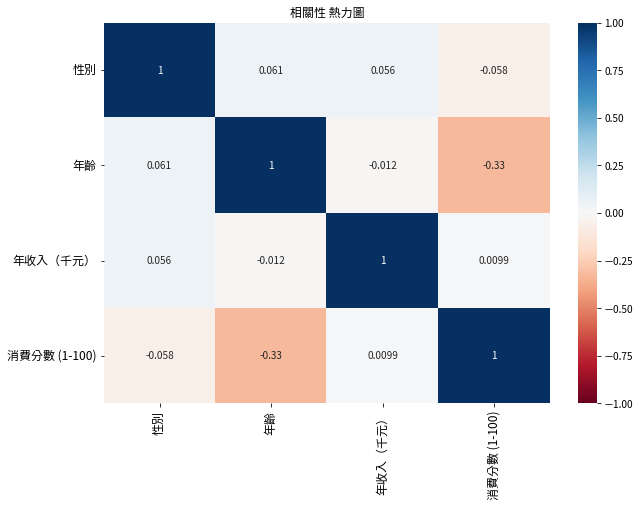

In [ ]:
plt.figure(figsize = (10,7))
s = sns.heatmap(df.corr(), annot = True, cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom, top)
plt.title("相關性 熱力圖")
plt.show()

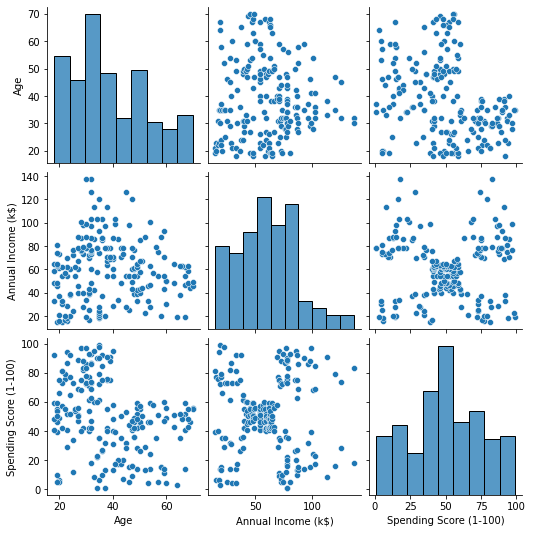

In [ ]:
figure = sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [ ]:
#資料預處理 - 2
# drop Gender
df.drop(['性別'], axis=1, inplace=True)

# Feature Scaling: Standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df)

### 選擇分群數量K值

選定K有兩種方法：一種是手肘法，另一種就是利用輪廓係數法Silhouette analysis。

輪廓係數法的概念是「找出同群資料點內最近/不同群越分散」的值，簡單來說就是；算出來的係數越大，代表分得越清楚。

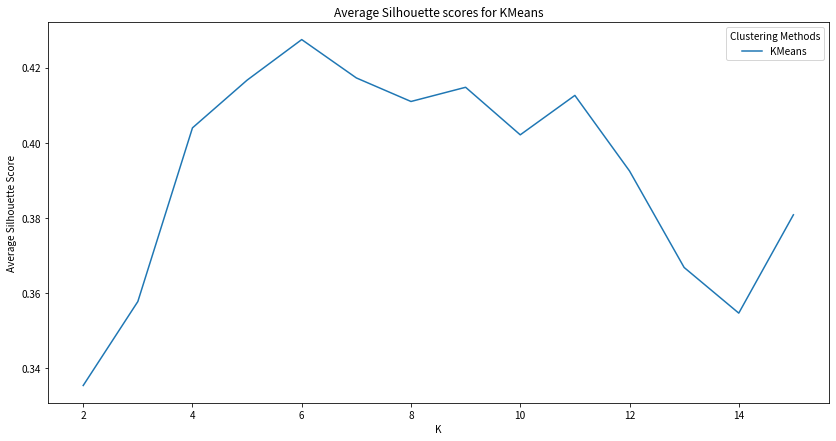

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
def plot_km_in_different_ks(df_std, start_k, end_k):
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.mixture import GaussianMixture
    
    avg_silhouette_scores = []

    for k in range(start_k, end_k+1):

        # Run the KMeans algorithm
        km = KMeans(n_clusters=k)
        km_labels = km.fit_predict(df_std)
 
        # calculate average silhouette scores
        km_silhouette_vals = silhouette_samples(df_std, km_labels)
        km_avg_score = np.mean(km_silhouette_vals)
        avg_silhouette_scores.append(km_avg_score)

    df_avg_silhouette_scores = pd.DataFrame(avg_silhouette_scores, columns = ['KM'])
    df_avg_silhouette_scores["k"] = range(start_k, end_k+1)
 
    
    # plot male and female left-handedness rates vs. age
    fig, ax = plt.subplots() # create figure and axis objects
    fig.set_size_inches(14, 7)
    ax.set_title('Average Silhouette scores for KMeans')
    ax.plot('k', 'KM', data=df_avg_silhouette_scores) 
    ax.legend(['KMeans'], title="Clustering Methods") # add a legend
    ax.set_xlabel('K')
    ax.set_ylabel("Average Silhouette Score");
    
plot_km_in_different_ks(df_std, 2, 15)

### KMeans 在 k=6 時分群表現最好。

In [ ]:
# using kmeans with k=6
km = KMeans(n_clusters=6)
labels = km.fit_predict(df_std)

# reload data since we might want to use our customerID later
df = pd.read_csv('/content/drive/MyDrive/My_Dataset /Mall_Customers.csv')
df['kmeans_label'] = labels

In [ ]:
# calculate descriptive summaries
summary = df.groupby("kmeans_label")[['Age', 'Spending Score (1-100)']].mean()
summary['年收入中位數(k)'] = df.groupby("kmeans_label")[['Annual Income (k$)']].median()
summary['數量'] = df.groupby('kmeans_label').CustomerID.count().values
summary['Male Cnt'] = df[df.Gender=="Male"].groupby("kmeans_label").CustomerID.count().values
summary['Female Cnt'] = df[df.Gender=="Female"].groupby("kmeans_label").CustomerID.count().values
summary['男性%'] = summary['Male Cnt']/summary['數量']
summary['女性%'] = summary['Female Cnt']/summary['數量']
summary.rename(columns={'Age':'平均年齡', "Spending Score (1-100)":'平均消費分數'}, inplace=True)

final_summary = summary[['平均年齡','平均消費分數',"年收入中位數(k)","數量","男性%","女性%"]].sort_values(by='平均消費分數', ascending=False)
final_summary

,平均年齡,平均消費分數,年收入中位數(k),數量,男性%,女性%
kmeans_label,,,,,,
2,32.692308,82.128205,79.0,39,0.461538,0.538462
4,25.250000,76.916667,24.5,24,0.416667,0.583333
3,56.333333,49.066667,54.0,45,0.422222,0.577778
1,26.684211,47.789474,60.0,38,0.368421,0.631579
0,45.523810,19.380952,25.0,21,0.380952,0.619048
5,41.939394,16.969697,86.0,33,0.575758,0.424242


In [ ]:
temp = final_summary

# convert index to a column and then rename each group
temp.reset_index(level=0, inplace=True)
temp["kmeans_label"]=temp["kmeans_label"].map({5: '高收入 低支出 中年族群', 
                                 3: '中等收入 中等支出 老年族群',
                                1: '中等收入 中等支出 年輕族群',
                                0: '低收入 低支出 中年族群',
                                2:'高收入 高支出 年輕族群',
                                4: '低收入 高支出 年輕族群'})
temp.rename(columns={'kmeans_label':'族群'}, inplace=True)
temp = temp.reindex(columns=['族群', '平均年齡', '平均消費分數', '男性%', '女性%', '年收入中位數(k)',
       '數量'])

temp

,族群,平均年齡,平均消費分數,男性%,女性%,年收入中位數(k),數量
0,高收入 高支出 年輕族群,32.692308,82.128205,0.461538,0.538462,79.0,39
1,低收入 高支出 年輕族群,25.250000,76.916667,0.416667,0.583333,24.5,24
2,中等收入 中等支出 老年族群,56.333333,49.066667,0.422222,0.577778,54.0,45
3,中等收入 中等支出 年輕族群,26.684211,47.789474,0.368421,0.631579,60.0,38
4,低收入 低支出 中年族群,45.523810,19.380952,0.380952,0.619048,25.0,21
5,高收入 低支出 中年族群,41.939394,16.969697,0.575758,0.424242,86.0,33


In [ ]:
temp[['男性%']] = temp[['男性%']]*100
temp[['女性%']] = temp[['女性%']]*100

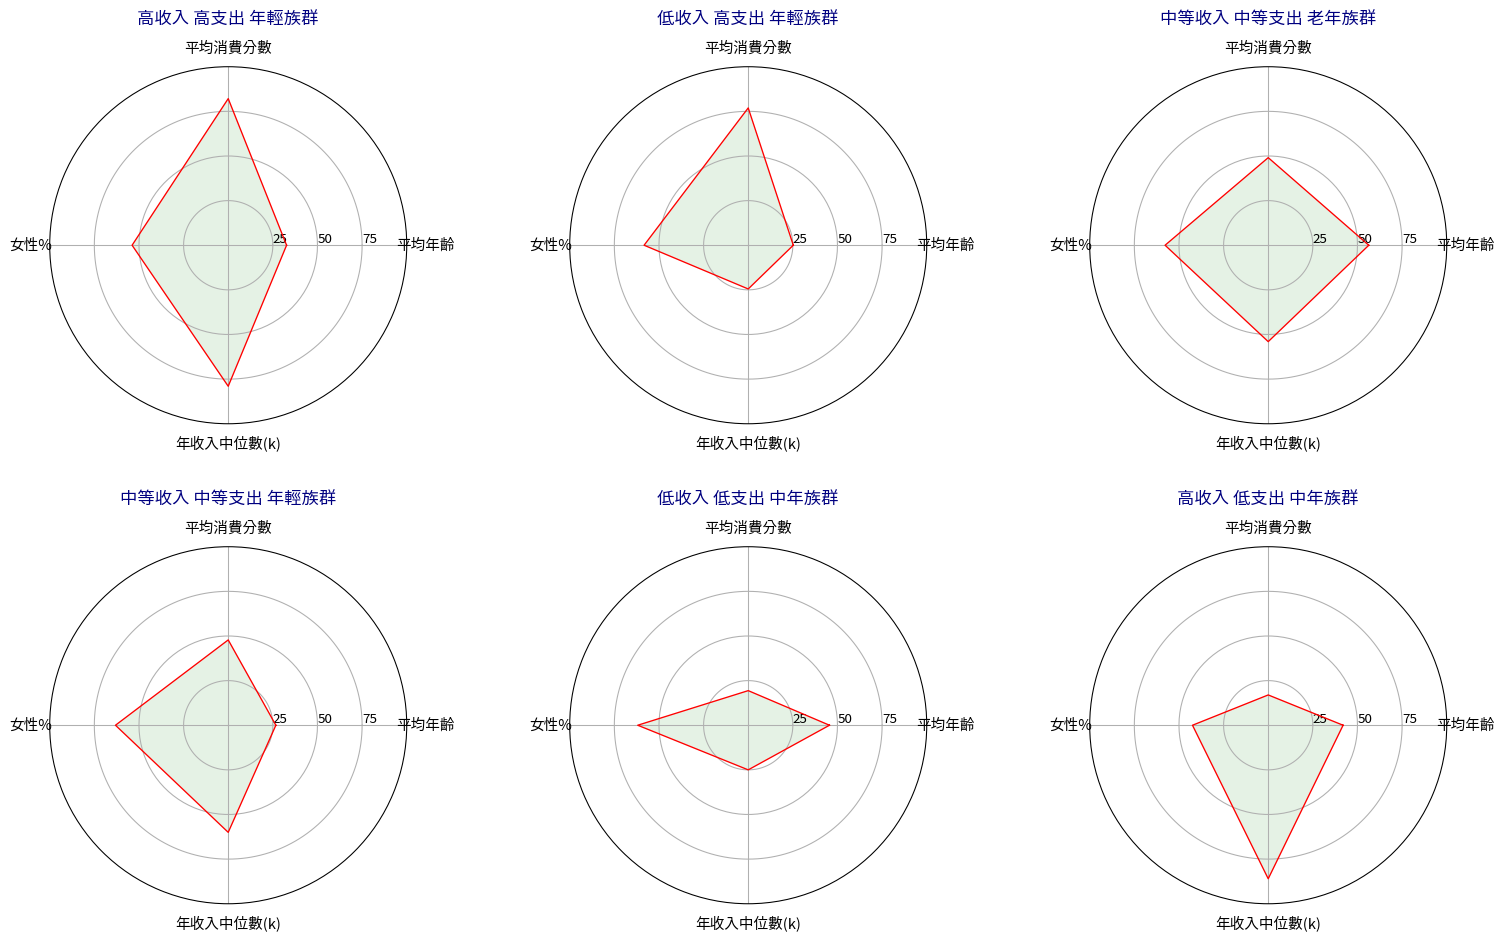

In [ ]:
# create radar charts
def multiple_radars(df, columns, row):
    from math import pi
    N = len(columns)
    columns_no_need = df[df.columns.difference(columns)]

    # But we need to repeat the first value to close the circular graph:
    values=df.loc[row].drop(columns_no_need).values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    #plt.subplots_adjust(left=None, bottom=None, right=None, top=0.5, wspace=None, hspace=None)
    # Initialise the spider plot

    ax = plt.subplot(2, 3, row+1, polar=True) 

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], columns, size=11)
    plt.title(df.loc[row].族群, size=13, y=1.1,fontweight="bold",  color='navy')
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], 
               ["25","50","75"], size=10)
    plt.ylim(0,100)

    # Plot data
    ax.plot(angles, values, linewidth=1, color='r', linestyle='solid')
    # Fill area
    ax.fill(angles, values, 'g', alpha=0.1)


my_dpi=96
plt.figure(figsize=(1600/my_dpi, 1000/my_dpi), dpi=my_dpi)


# number of variable
columns=['平均年齡', '平均消費分數', '女性%', '年收入中位數(k)']
for i in range(0,6): 
    multiple_radars(temp, columns, i)
plt.tight_layout(pad=3.0)

我們根據年齡、消費支出分數、年收入做族群分類。而雷達圖能夠幫助我們更清楚了解各族群的分布特性。